# PHY482 Group Project
Authors: **Kyle Taft and Thong Van**

## Abstract

Our code and computation will initially focus on a monochromatic plane wave interacting with different components essential to manipulating light via amplitude, phase, and polarization. We first explore the simple cases of the half and quarter wave plate. Next, we describe how our light wave changes with respect to an electro-optic modulator (EOM) or a voltage controlled birefringent crystal. We will compute consequences from such interactions such as sidebands and identify interesting scenarios at extremes of our set parameters(frequency, voltage, index of refraction, materials, etc).

We then decipher how our light wave changes with respect to a basic SLM unit cell in the following respective order: cover glass, birefringent crystal, mirror coating. We combine our basic SLM cell with other optical approaches such as a wave plate or even a Machl-Zehnder interferometer to design an architecture capable of creating bright, mild, and dark spots by interference. Finally, we compute how to create different kinds of patterns or even images by controlling contrast between brightness and maybe even colors. If time permits, we will compute the voltages and polarization of different incident light waves needed to create an image

## Creating a monochromatic plane wave

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Define constants
# c = 299792458  # Speed of light (m/s)
c = 1 
k = 2  # Wavenumber (rad/m)
w = k * c  # Angular frequency (rad/s)
E0 = 1  # Amplitude of electric field (V/m)
B0 = E0 / c  # Amplitude of magnetic field (T)

# Define the time parameters
tmax = 10
delta_t = 0.1

# Choose a propagation direction 
prop_dir = np.array([1, 0, 0])

# Choose a polarization direction
pol_dir = np.array([0, 1, 0])

def electric_field(x, y, z, t=0, prop_dir=np.array([1, 0, 0]), pol_dir=np.array([0, 1, 0])):
    """
    Calculate the electric field at a given point in space and time
    :param x,y,z: spacial coordinate of the point
    :param t: time
    :param prop_dir: propagation direction of the wave
    :param pol_dir: polarization direction of the electric field
    :param index: index specifying the direction
    :return: Ex, Ey, Ez: electric field components at the given point and time
    """
    # Define the electric field equation
    E = E0 * np.exp(1j * (k * (prop_dir[0] * x + prop_dir[1] * y + prop_dir[2] * z) - w * t))

    # Calculate electric field components
    Ex = E.real * pol_dir[0]
    Ey = E.real * pol_dir[1]
    Ez = E.real * pol_dir[2]
    return Ex, Ey, Ez

def magnetic_field(x, y, z, t=0, prop_dir=np.array([1, 0, 0]), pol_dir=np.array([0, 1, 0])):
    """
    Calculate the magnetic field at a given point in space and time
    :param x,y,z: spacial coordinate of the point
    :param t: time
    :param prop_dir: propagation direction of the wave
    :param pol_dir: polarization direction of the electric field
    :param index: index specifying the direction
    :return: Bx, By, Bz: magnetic field components at the given point and time
    """
    # Find the direction of the magnetic field
    B_direction = np.cross(prop_dir, pol_dir)

    # Calculate the magnetic field
    B = B0 * np.exp(1j * (k * (prop_dir[0] * x + prop_dir[1] * y + prop_dir[2] * z) - w * t))

    # Calculate magnetic field components
    Bx = B.real * B_direction[0]
    By = B.real * B_direction[1]
    Bz = B.real * B_direction[2]
    return Bx, By, Bz

def max_coordinate(prop_dir, t, index):
    """
    Define how far the wave has propagated in the given direction
    :param prop_dir: propagation direction of the wave
    :param t: time
    :param index: index specifying the direction
    :return: maximum coordinate in the given direction
    """
    if prop_dir[index] == 0:
        return 1
    else:
        return prop_dir[index] * c * t


for i, t in enumerate(np.arange(0, tmax, delta_t)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Define grid for plotting
    num_points = 100
    x = np.linspace(0, max_coordinate(prop_dir, tmax, 0), num_points)
    y = np.linspace(0, max_coordinate(prop_dir, tmax, 1), num_points)
    z = np.linspace(0, max_coordinate(prop_dir, tmax, 2), num_points)

    # Calculate the field components
    Ex, Ey, Ez = electric_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir)
    Bx, By, Bz = magnetic_field(x, y, z, t=t, prop_dir=prop_dir, pol_dir=pol_dir)

    # Plot in 3D
    ax.plot(x, Ey, Ez, color='b', label='Electric field')
    ax.plot(x, By, Bz, color='r', label='Magnetic field')

    # Show the propagation direction
    ax.plot([0, prop_dir[0] * max_coordinate(prop_dir, tmax, 0)], 
            [0, prop_dir[1] * max_coordinate(prop_dir, tmax, 1)], 
            [0, prop_dir[2] * max_coordinate(prop_dir, tmax, 2)], color='k', linestyle='--', label='Propagation axis')

    ax.set_xlim(0, max_coordinate(prop_dir, 10, 0))
    ax.set_ylim(-1, max_coordinate(prop_dir, 10, 1))
    ax.set_zlim(-1, max_coordinate(prop_dir, 10, 2))

    # Set the labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Mono-chromatic plane wave in 3D')
    ax.legend()
    ax.figure.savefig(f'figures/wave_{i:02d}.png')
    plt.close()


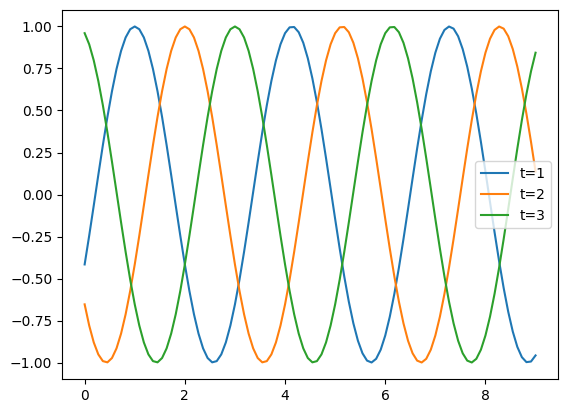

In [10]:
_, Ey1, _ = electric_field(x, y, z, t=1, prop_dir=prop_dir, pol_dir=pol_dir)
_, Ey2, _ = electric_field(x, y, z, t=2, prop_dir=prop_dir, pol_dir=pol_dir)
_, Ey3, _ = electric_field(x, y, z, t=3, prop_dir=prop_dir, pol_dir=pol_dir)

# Plot the electric field
plt.figure()
plt.plot(x, Ey1, label='t=1')
plt.plot(x, Ey2, label='t=2')
plt.plot(x, Ey3, label='t=3')
plt.legend()

In [13]:
# Convert to GIF using ffmpeg
import subprocess

# # Command to convert images to GIF
# command = ['ffmpeg', '-framerate', '5', '-i', 'figures/wave_%03d.png', 'output.gif']

# Command: ffmpeg -framerate 5 -start_number 0 -i wave_%02d.png output.gif
command = ['ffmpeg', '-framerate', '5', '-start_number', '0', '-i', 'figures/wave_%02d.png', 'output.gif']
# Run the command
subprocess.run(command)